In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json
from numpy import linalg as LA
import tensorflow as tf
import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'
elif ui == 'slibkind':
    p = '/Users/slibkind/Documents/'
##ADD YOUR PATH TO CODE REPOS HERE

net = 'binary_inputs'
PATH_YANGNET = os.path.join(p,'code/sophie-nets',net) 
sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools

from thesis_tools import plot_interp_pca1D

In [2]:
# Get the network
#WHERE IS THE NETWORK
def get_network(rule_trains):
  rnn_type = 'LeakyRNN' 
  activation = 'softplus'
  w_init = 'randgauss'
  ruleset = 'basic' # what set of tasks (look up in task.py)
  n_rnn = str(256)
  l2w = -7.0        # exponent of regularization terms
  l2h = -7.0
  l1w = 0
  l1h = 0
  lr = -7.0   # learning rate
  seed = str(0)
  rule_trains_str = '_'.join(rule_trains)
  sigma_rec = 1/20
  sigma_x = 2/20
  w_rec_coeff = .9

  net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)
  net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

  dir_specific_all = os.path.join(ruleset,rnn_type,activation,
      w_init,str(len(rule_trains))+'_tasks',str(n_rnn)+'_n_rnn',net_name+net_name2)

  return os.path.join(p,'data','sophie-nets',net,'data',dir_specific_all,str(seed))

In [3]:
dir = 'figures'

# Memory Response Task

In [4]:
ruleset = 'basic'
m = get_network(['delaygo'])
q_tol_name = 'tol_q_e_6.0'


## Structure of the input and output

In [5]:
rule = 'delaygo'

model = Model(m)
with tf.Session() as sess:
    model.restore()      # set up tf graph with model m
    var_list = model.var_list # variables learned over training
    params = [sess.run(var) for var in var_list]
    hparams = model.hp
    

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/slibkind/Documents/data/sophie-nets/binary_inputs/data/basic/LeakyRNN/softplus/randgauss/1_tasks/256_n_rnn/lr7.0l2_w7.0_h7.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.9_delaygo/0/model.ckpt
Model restored from file: /Users/slibkind/Documents/data/sophie-nets/binary_inputs/data/basic/LeakyRNN/softplus/randgauss/1_tasks/256_n_rnn/lr7.0l2_w7.0_h7.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.9_delaygo/0/model.ckpt


In [6]:
trial = generate_trials(rule, hparams, mode = 'test', noise_on = False)

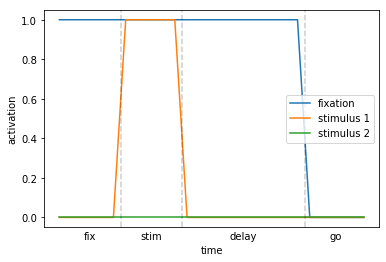

In [7]:
plt.plot(trial.x[:, 1, 0:3])
plt.legend(['fixation', 'stimulus 1', 'stimulus 2'])
plt.xlabel('time')
plt.ylabel('activation')

plt.xticks([12.5, 37.5, 75, 112.5], labels=['fix', 'stim', 'delay', 'go'])
plt.tick_params(axis='x', which='both', length=0, width=0, direction='in')


# Create dashed vertical lines
vertical_lines = [25, 50, 100]
for line in vertical_lines:
    plt.axvline(x=line, color='black', alpha=0.2, ls='dashed')

plt.savefig(os.path.join(dir, 'memory_rnn_inputs.pdf'))


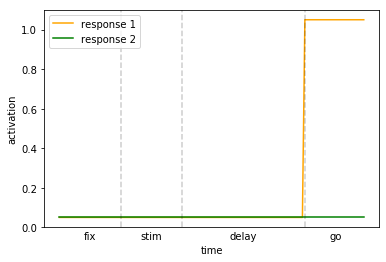

In [8]:
lines = plt.plot(trial.y[:,1,[1,2]])
lines[0].set_color('orange')
lines[1].set_color('green')
plt.legend(['response 1', 'response 2'])
plt.xlabel('time')
plt.ylabel('activation')

plt.xticks([12.5, 37.5, 75, 112.5], labels=['fix', 'stim', 'delay', 'go'])
plt.tick_params(axis='x', which='both', length=0, width=0, direction='in')


# Create dashed vertical lines
vertical_lines = [25, 50, 100]
for line in vertical_lines:
    plt.axvline(x=line, color='black', alpha=0.2, ls='dashed')


plt.savefig(os.path.join(dir, 'memory_rnn_true_outputs.pdf'))


In [9]:
rule = 'delaygo'

model = Model(m)
with tf.Session() as sess:
    model.restore()      # set up tf graph with model m
    trial = generate_trials(rule, hparams, mode='test', noise_on=False)
    feed_dict = tools.gen_feed_dict(model, trial, hparams)
    h, y_hat = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #HIDDEN STATE, OUTPUT (n_TIME, n_TRIAL, n_UNIT)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/slibkind/Documents/data/sophie-nets/binary_inputs/data/basic/LeakyRNN/softplus/randgauss/1_tasks/256_n_rnn/lr7.0l2_w7.0_h7.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.9_delaygo/0/model.ckpt
Model restored from file: /Users/slibkind/Documents/data/sophie-nets/binary_inputs/data/basic/LeakyRNN/softplus/randgauss/1_tasks/256_n_rnn/lr7.0l2_w7.0_h7.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.9_delaygo/0/model.ckpt


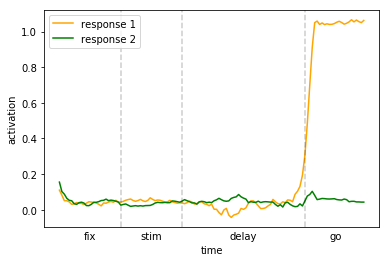

In [10]:
lines = plt.plot(y_hat[:,1,[1,2]])
lines[0].set_color('orange')
lines[1].set_color('green')

plt.legend(['response 1', 'response 2'])
plt.xlabel('time')
plt.ylabel('activation')

plt.xticks([12.5, 37.5, 75, 112.5], labels=['fix', 'stim', 'delay', 'go'])
plt.tick_params(axis='x', which='both', length=0, width=0, direction='in')


# Create dashed vertical lines
vertical_lines = [25, 50, 100]
for line in vertical_lines:
    plt.axvline(x=line, color='black', alpha=0.2, ls='dashed')

plt.savefig(os.path.join(dir, 'memory_rnn_outputs.pdf'))

## Fixed Point Structure

Show the fixed point structure at each task period

Show the interpolated fixed point structure over a sample rune

Show the fixed point structure interpolating between `stim 1`, `delay`, and `stim 2` periods

In [11]:
from thesis_tools import plot_interp_pca1D

m = get_network(['fdgo', 'delaygo', 'fdanti', 'delayanti'])
ri_set = [1, 1, 3,3]
epoch_list = ['stim1','delay1', 'delay1', 'stim1']
trial_num = [0,0, 0,0] 

plot_interp_pca1D(ri_set, epoch_list, trial_num, ruleset, m, q_tol_name, q_thresh = 1e-8)

TypeError: unhashable type: 'list'